In [1]:
import nibabel as nib
from nilearn.plotting import plot_surf
from nilearn.plotting import plot_surf_stat_map
import matplotlib.pyplot as plt
from nilearn import datasets
from matplotlib.colors import ListedColormap
import numpy as np

https://static-content.springer.com/esm/art%3A10.1038%2Fnature18933/MediaObjects/41586_2016_BFnature18933_MOESM330_ESM.pdf

load glasser annotation and roi dictionary

In [12]:
fsaverage = datasets.fetch_surf_fsaverage(mesh = 'fsaverage6')
lh_labels, lh_ctab, lh_names= nib.freesurfer.io.read_annot('/Users/h/Documents/projects_local/life-encoding/scripts/HCP-MMP/lh.HCP_MMP1.fsaverage6.annot')
rh_labels, rh_ctab, rh_names= nib.freesurfer.io.read_annot('/Users/h/Documents/projects_local/life-encoding/scripts/HCP-MMP/rh.HCP_MMP1.fsaverage6.annot')
# rois = {
#     "V1": [1],             # Primary Visual
#     "FFC": [18],           # Fusiform   
#     "PHG": [126,155,127],  # ParaHippocampal Gyrus   
#     "MT/MST": [2,23],      # Medial Superior Temporal Area, Middle Temporal Area
#     "LOC": [140,141,157,156,159,2,23],
#     "pSTS": [28,139],
#     "TPJ": [149,150,151],  # Area TemporoParietoOccipital	Junction 1, 2, 3
#     "AIP": [117, 116, 148, 147], # Anterior Intraparietal "PF": [ # PFT, PF, PF
#     "SM": [8,9,51,52,53],           # 8: Primary Motor Cortex, Primary	Sensory	Cortex
#     "vPM": [78,80] ,       # 6r, IFJP, 43, 6v
#         }

rois = {
    "V1": [1],             # Primary Visual
    "FFC": [18],           # Fusiform   
    "PHG": [126,155,127],  # ParaHippocampal Gyrus   
    #"MT/MST": [2,23],      # Medial Superior Temporal Area, Middle Temporal Area
    "LOC": [140,141,157,156,159,2,23],
    "pSTS": [28,139],       # posterior superior temporal sulcus
    "TPJ": [149,150,151],  # Area TemporoParietoOccipital	Junction 1, 2, 3
    "AIP": [117, 116, 148, 147], # Anterior Intraparietal "PF": [ # PFT, PF, PF
    "SM": [8,9,51,52,53],           # 8: Primary Motor Cortex, Primary	Sensory	Cortex
    "vPM": [78,80],       # ventral Premotor6r, IFJP, 43, 6v
    "PPC": [13, 19, 16, 17] # posterior parietal cortex (V3A, V7, IPS1)
        }
roi_order = ["V1", "LOC", "FFC", "PHG", "pSTS", "TPJ", "PCC", "AIP", "vPM", "SM",]
# rois = {"PHG": [126,155,127],  # ParaHippocampal Gyrus
#         "V1": [1],             # Primary Visual
#         # "EVC": [4,5],          # Early Visual Cortex (V2 Second Visual Area, V3 Third Visual Area)
#         # "V4": [6],             # Fourth Visual Area
#         # "3A" 53
#         "SM": [8,9,51,52,53],           # 8: Primary Motor Cortex, Primary	Sensory	Cortex
#         "MT/MST": [2,23],      # Medial Superior Temporal Area, Middle Temporal Area
#         # "RSC": [14],           # Retrosplenial
#         "LO_DEP": [20,21,159,156,157], # Lateral Occipital, FST, V4T
#         "LOC": [140,141,157,156,159,2,23],
#         "FFC": [18],           # Fusiform 
#         "PIT": [22],           # Posterior Inferior Temporal >> NOTE: related to OFA. Don't combine with FFC
#         "STV": [28],           # Superior Temporal Visual Area
#         "TPJ_backup": [139,140,141],  # Area TemporoParietoOccipital	Junction 1, 2, 3
#         "TPJ": [149,150,151], #144,145,
#         "pSTS": [28,139],
#         "AIP": [117, 116, 148, 147], # Anterior Intraparietal "PF": [ # PFT, PF, PF
#         "premotor": [78,80] ,    # 6r, IFJP, 43, 6v
#         # "premotorv2":[78,80,99,56]

#         }

In [3]:
# function for plotting roi on a 1 row/6 column figure
# NOTE: left and right hemi annotations differ. 
# Here, we plot them  separately
def plot_roi(lh_roi_map, rh_roi_map, roi_name, cmap):
    # align = os.path.basename(gii_dir)
    figure, axes = plt.subplots(
        1, 6, subplot_kw={'projection': '3d'}, figsize=(20, 30))

    plot_surf_stat_map(fsaverage['infl_left'], lh_roi_map,
                       bg_map=fsaverage['sulc_left'],
                       title=f'{roi_name} lateral lh', 
                       hemi='left', view='lateral', cmap=cmap, axes=axes[0], colorbar=False)  # vmin=.05, vmax=.5,
    plot_surf_stat_map(fsaverage['infl_right'], rh_roi_map,
                       bg_map=fsaverage['sulc_right'],
                       title=f'{roi_name} lateral rh', 
                       hemi='right', view='lateral', cmap=cmap, axes=axes[1], colorbar=False)  # vmin=.05, vmax=.5,

    plot_surf_stat_map(fsaverage['infl_left'], lh_roi_map,
                       bg_map=fsaverage['sulc_left'],
                       title=f'{roi_name} medial lh', 
                       hemi='left', view='medial', cmap=cmap, axes=axes[2], colorbar=False)  # vmin=.05, vmax=.5,
    plot_surf_stat_map(fsaverage['infl_right'], rh_roi_map,
                       bg_map=fsaverage['sulc_right'],
                       title=f'{roi_name} medial rh', 
                       hemi='right', view='medial', cmap=cmap, axes=axes[3], colorbar=False)  # vmin=.05, vmax=.5,

    plot_surf_stat_map(fsaverage['infl_left'], lh_roi_map,
                       bg_map=fsaverage['sulc_left'],
                       title=f'{roi_name} ventral lh', 
                       hemi='left', view='ventral', cmap=cmap, axes=axes[4], colorbar=False)  # vmin=.05, vmax,=.5,
    plot_surf_stat_map(fsaverage['infl_right'], rh_roi_map,
                       bg_map=fsaverage['sulc_right'],
                       title=f'{roi_name} ventral rh', 
                       hemi='right', view='ventral', cmap=cmap, axes=axes[5], colorbar=False)  # vmin=.05, vmax=.5,


    plt.show()

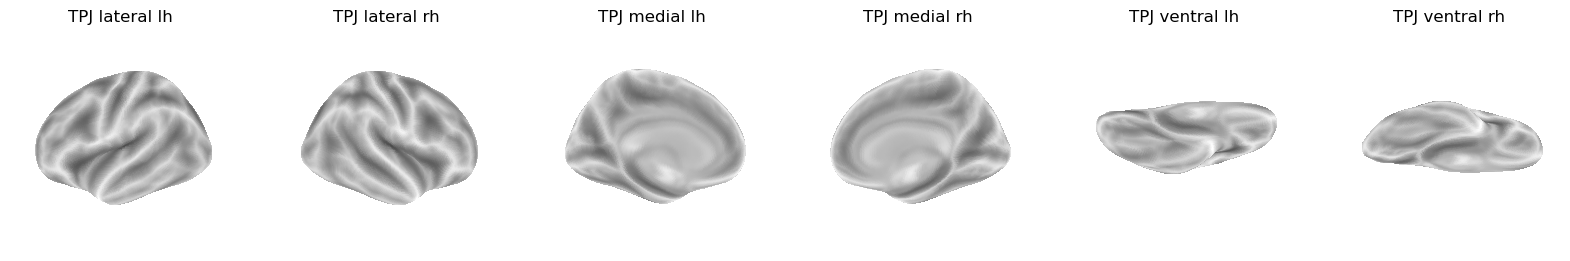

In [16]:
roi_name = 'TPJ' 
lh_roi_map = np.full(lh_labels.shape, np.nan)
lh_roi_map[np.in1d(lh_labels, rois[roi_name])] = 1

rh_roi_map = np.full(rh_labels.shape, np.nan)
rh_roi_map[np.in1d(rh_labels, rois[roi_name])] = 1
plot_roi(lh_roi_map, rh_roi_map, roi_name, 'Reds')

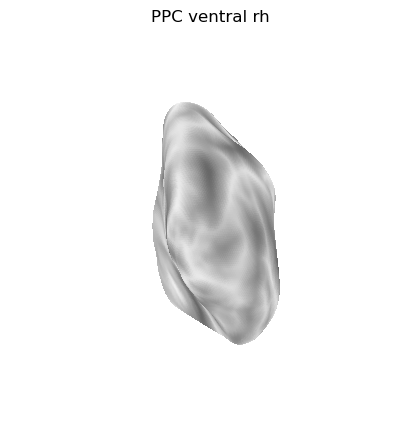

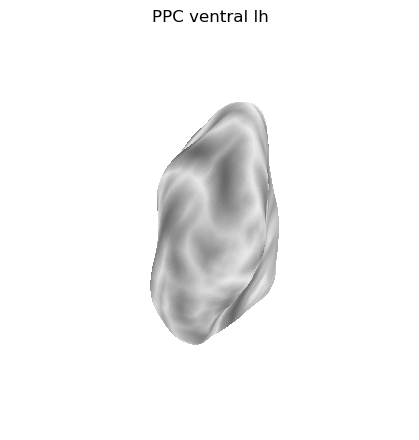

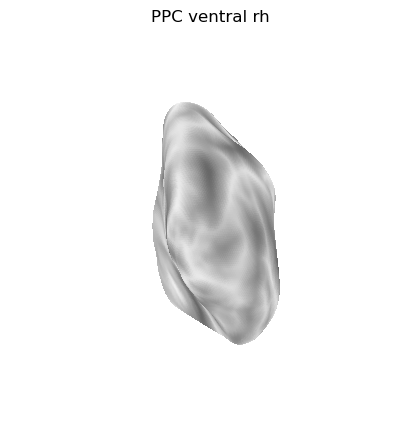

In [15]:
roi_name = 'PPC' 
lh_roi_map = np.full(lh_labels.shape, np.nan)
lh_roi_map[np.in1d(lh_labels, rois[roi_name])] = 1

rh_roi_map = np.full(rh_labels.shape, np.nan)
rh_roi_map[np.in1d(rh_labels, rois[roi_name])] = 1
# plot_roi(lh_roi_map, rh_roi_map, roi_name, 'Reds')

plot_surf_stat_map(fsaverage['infl_left'], lh_roi_map,
                    bg_map=fsaverage['sulc_left'],
                    title=f'{roi_name} ventral lh', 
                    hemi='left', view='posterior', colorbar=False)  # vmin=.05, vmax,=.5,
plot_surf_stat_map(fsaverage['infl_right'], rh_roi_map,
                    bg_map=fsaverage['sulc_right'],
                    title=f'{roi_name} ventral rh', 
                    hemi='right', view='posterior',  colorbar=False)  # vmin=.05, vmax=.5,


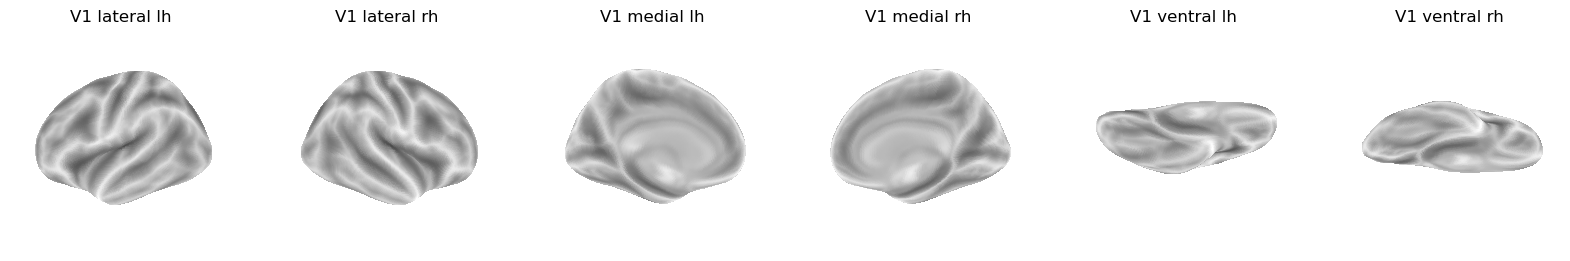

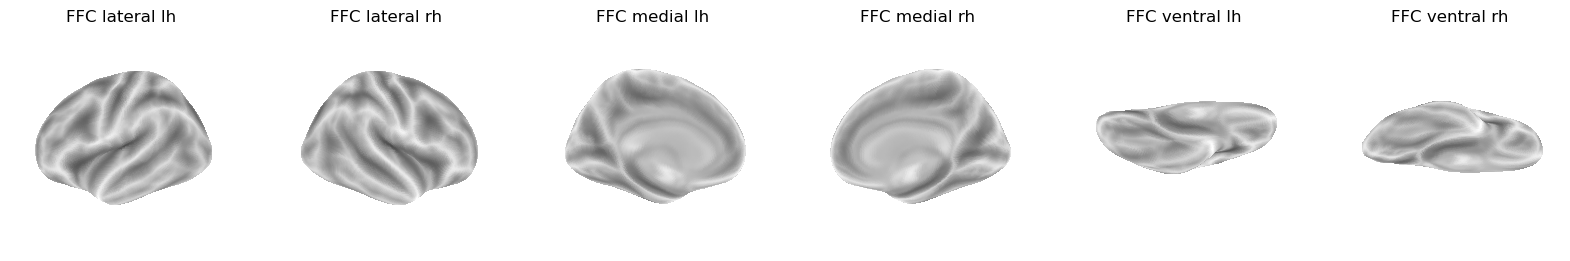

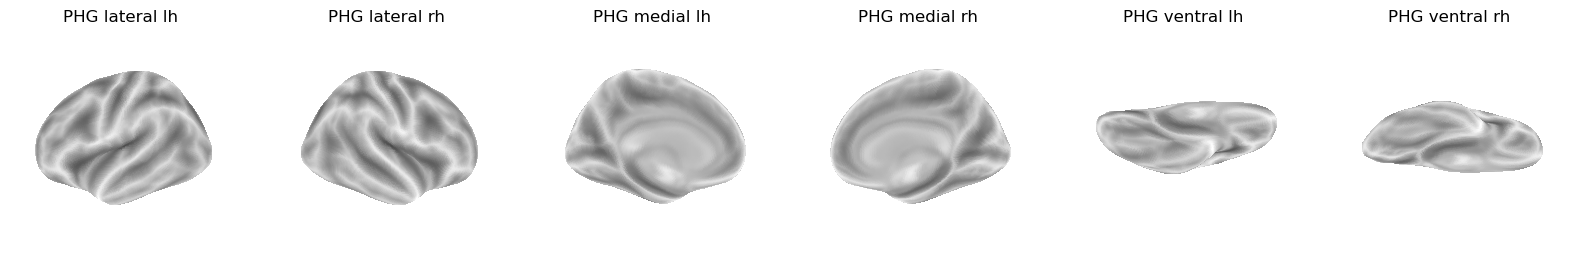

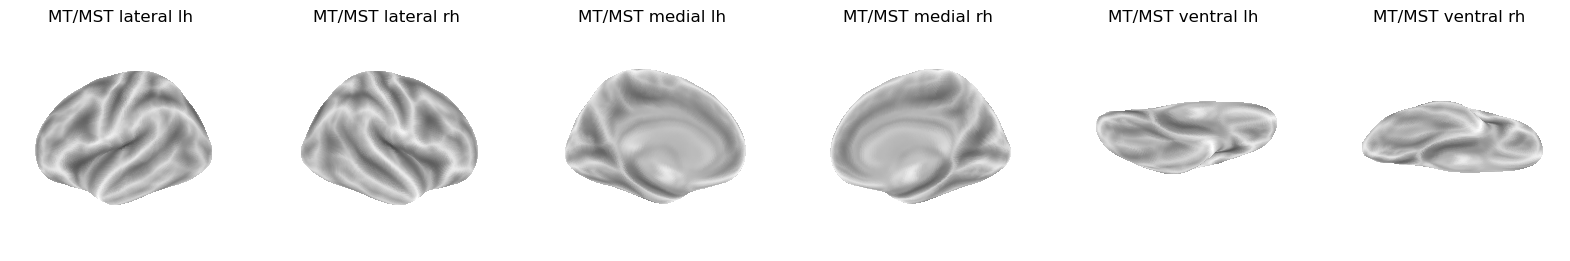

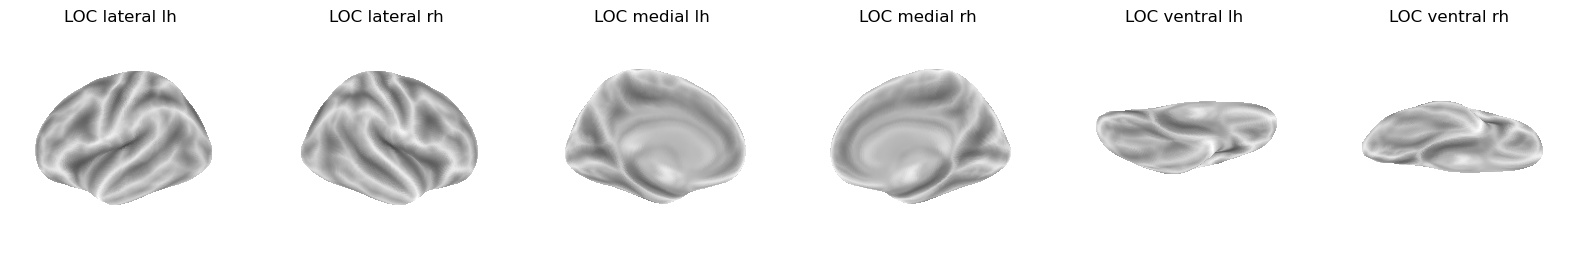

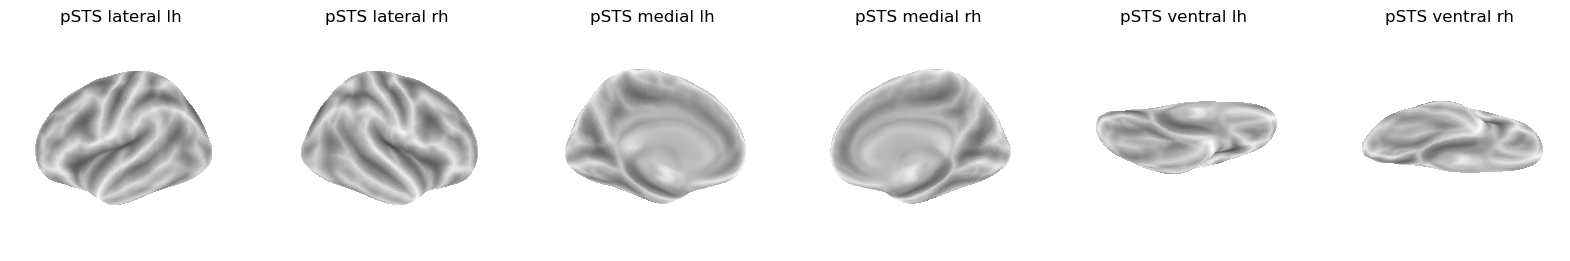

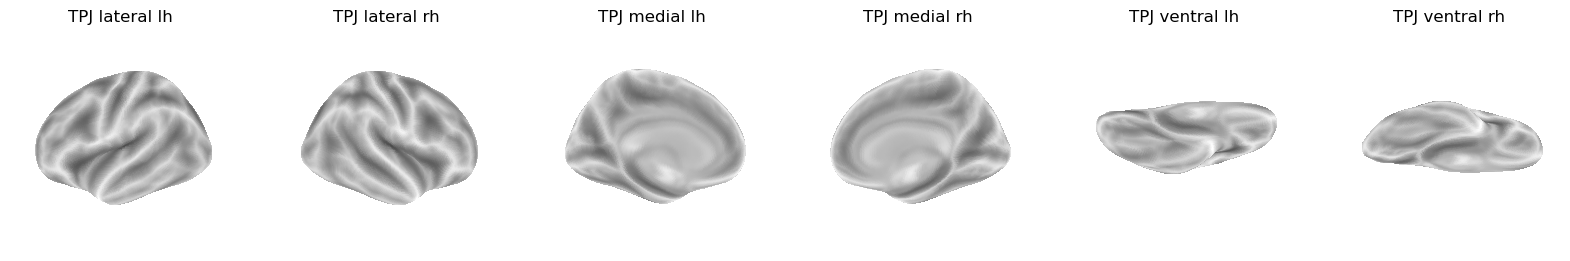

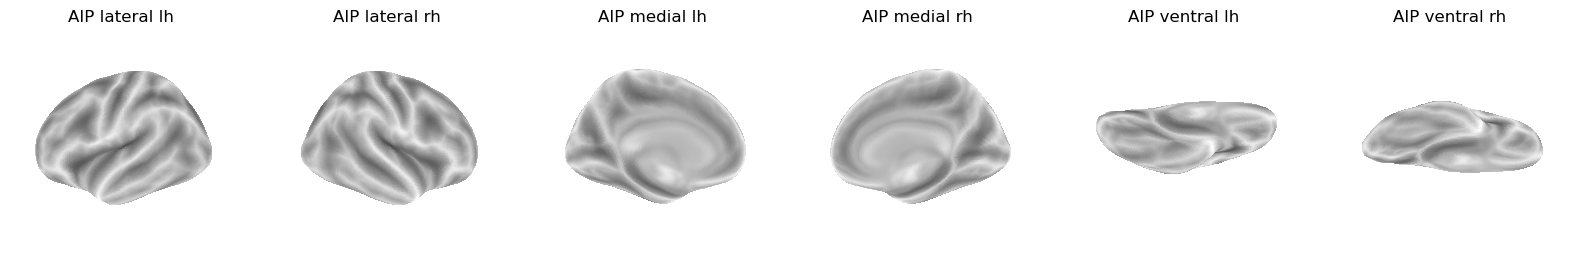

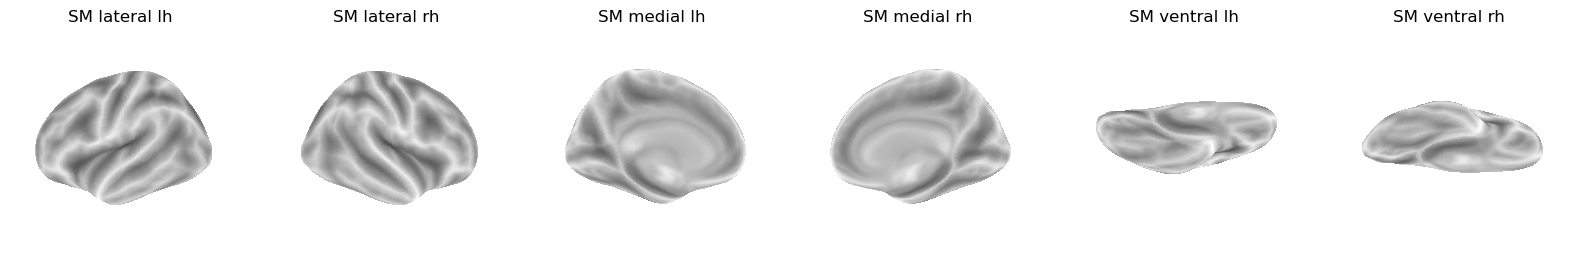

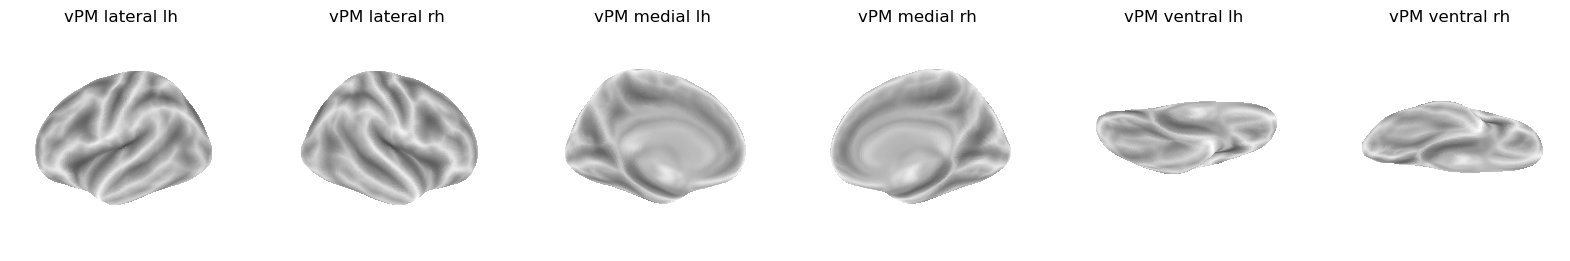

In [7]:
for roi_name in rois.keys():
    lh_roi_map = np.full(lh_labels.shape, np.nan)
    lh_roi_map[np.in1d(lh_labels, rois[roi_name])] = 1

    rh_roi_map = np.full(rh_labels.shape, np.nan)
    rh_roi_map[np.in1d(rh_labels, rois[roi_name])] = 1
    plot_roi(lh_roi_map, rh_roi_map, roi_name, 'Reds')


In [22]:
roi_order = ['V1', 'FFC', 'PHG','MT/MST',  'LOC', 'pSTS', 'TPJ', 'AIP', 'SM', 'vPM'] 

In [43]:
unique_colors = [cmap(i / len(roi_order)) for i in range(len(roi_order))]


In [48]:
unique_colors
roi_color_map

{0: (0.0, 0.0, 0.0, 1.0),
 1: (0.4287313725490196, 0.0, 0.613078431372549, 1.0),
 2: (0.0, 0.18301960784313726, 0.8667, 1.0),
 3: (0.0, 0.6444666666666666, 0.7333666666666667, 1.0),
 4: (0.0, 0.6091549019607843, 0.07319803921568624, 1.0),
 5: (0.0, 0.8849960784313726, 0.0, 1.0),
 6: (0.7999666666666666, 0.9777666666666667, 0.0, 1.0),
 7: (1.0, 0.6784313725490196, 0.0, 1.0),
 8: (0.8928372549019608, 0.0, 0.0, 1.0)}

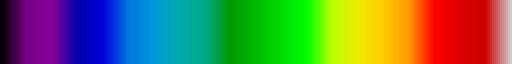

In [54]:
cmap

In [5]:
lh_roi_map = np.full(lh_labels.shape, np.nan)
rh_roi_map = np.full(rh_labels.shape, np.nan)
legend_labels = []
legend_colors = []

cmap = plt.cm.nipy_spectral #'Dark2'
unique_colors = [cmap(i / len(roi_order)) for i in range(len(roi_order))]


for i, roi_name in enumerate(roi_order):#rois.keys()):
    lh_roi_map[np.in1d(lh_labels, rois[roi_name])] = i
    rh_roi_map[np.in1d(rh_labels, rois[roi_name])] = i
    legend_labels.append(roi_name)  # Names of the ROIs
    legend_colors.append(cmap(i / len(roi_order))) # Corresponding colors


figure, axes = plt.subplots(
    1, 6, subplot_kw={'projection': '3d'}, figsize=(20, 30))

plot_surf_stat_map(fsaverage['infl_left'], lh_roi_map,
                    bg_map=fsaverage['sulc_left'],
                    # title=f'{roi_name} lateral lh', 
                    hemi='left', view='lateral', cmap=cmap, axes=axes[0], colorbar=False) #,  vmax=len(roi_order))
plot_surf_stat_map(fsaverage['infl_right'], rh_roi_map,
                    bg_map=fsaverage['sulc_right'],
                    # title=f'{roi_name} lateral rh', 
                    hemi='right', view='lateral', cmap=cmap, axes=axes[1], colorbar=False) #, vmax=len(roi_order))

plot_surf_stat_map(fsaverage['infl_left'], lh_roi_map,
                    bg_map=fsaverage['sulc_left'],
                    # title=f'{roi_name} medial lh', 
                    hemi='left', view='medial', cmap=cmap, axes=axes[2], colorbar=False) #,  vmax=len(roi_order))
plot_surf_stat_map(fsaverage['infl_right'], rh_roi_map,
                    bg_map=fsaverage['sulc_right'],
                    # title=f'{roi_name} medial rh', 
                    hemi='right', view='medial', cmap=cmap, axes=axes[3], colorbar=False) #,  vmax=len(roi_order))

plot_surf_stat_map(fsaverage['infl_left'], lh_roi_map,
                    bg_map=fsaverage['sulc_left'],
                    # title=f'{roi_name} ventral lh', 
                    hemi='left', view='ventral', cmap=cmap, axes=axes[4], colorbar=False) #,  vmax=len(roi_order))
plot_surf_stat_map(fsaverage['infl_right'], rh_roi_map,
                    bg_map=fsaverage['sulc_right'],
                    # title=f'{roi_name} ventral rh', 
                    hemi='right', view='ventral', cmap=cmap, axes=axes[5], colorbar=False) #,  vmax=len(roi_order))


# Create a legend using a proxy artist (a small rectangle) for each color
# legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in legend_colors]
# axes[6].legend(legend_handles, roi_order, loc='upper right')

# Show the plot
plt.show()

NameError: name 'roi_order' is not defined